# Adding Data Labels to Plots

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Line Plot

In [4]:
# set up flights by year dataframe
year_flights = flights.groupby('year').sum().reset_index()
year_flights.describe()

,year,passengers
count,12.000000,12.000000
mean,1954.500000,3363.583333
std,3.605551,1390.585780
min,1949.000000,1520.000000
25%,1951.750000,2283.500000
50%,1954.500000,3137.500000
75%,1957.250000,4458.750000
max,1960.000000,5714.000000


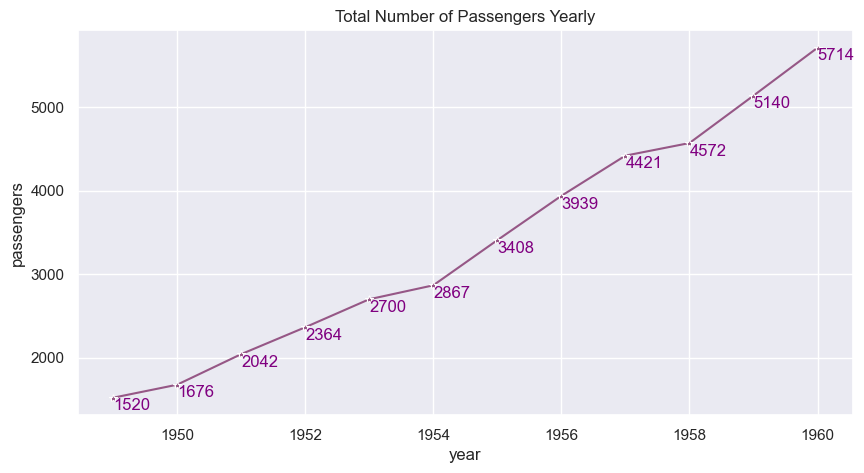

In [5]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='year', y='passengers', data=year_flights, marker='*', color='#965786')

# title the plot
ax.set(title='Total Number of Passengers Yearly')

# label points on the plot
for x, y in zip(year_flights['year'], year_flights['passengers']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x,  # x-coordinate position of data label
             y = y-150,  # y-coordinate position of data label, adjusted to be 150 below the data point
             s = '{:.0f}'.format(y),  # data label, formatted to ignore decimals
             color = 'purple')  # set colour of line
    
# for data labels to have background colour
#     plt.text(x, y-150, '{:.0f}'.format(y), color='white').set_backgroundcolor('#965786')


### Line Plot Only Label Certain Points

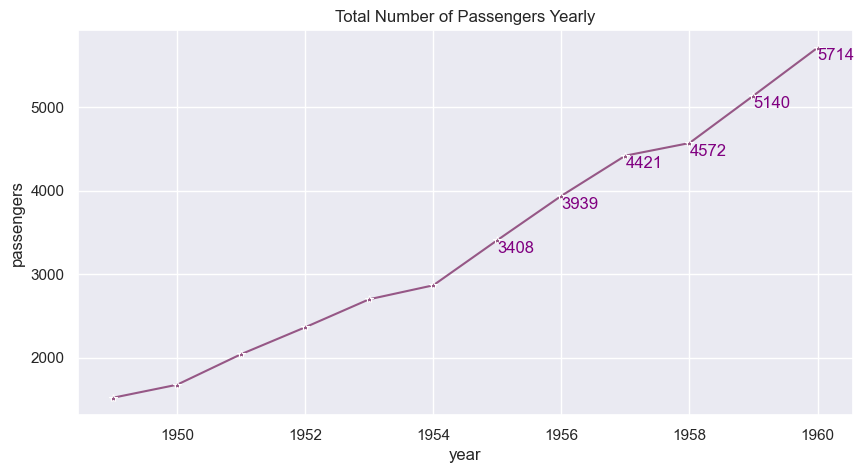

In [6]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='year', y='passengers', data=year_flights, marker='*', color='#965786')

# title the plot
ax.set(title='Total Number of Passengers Yearly')

mean = year_flights['passengers'].mean()

# label points on the plot only if they are higher than the mean
for x, y in zip(year_flights['year'], year_flights['passengers']):
    if y > mean:
        plt.text(x = x,  # x-coordinate position of data label
                 y = y-150,  # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = '{:.0f}'.format(y),  # data label, formatted to ignore decimals
                 color = 'purple')  # set colour of line


## Histogram

C:\Users\Mark\AppData\Local\Temp\ipykernel_15248\1999738000.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(flights['passengers'], color='#9d94ba', bins=10, kde=False)


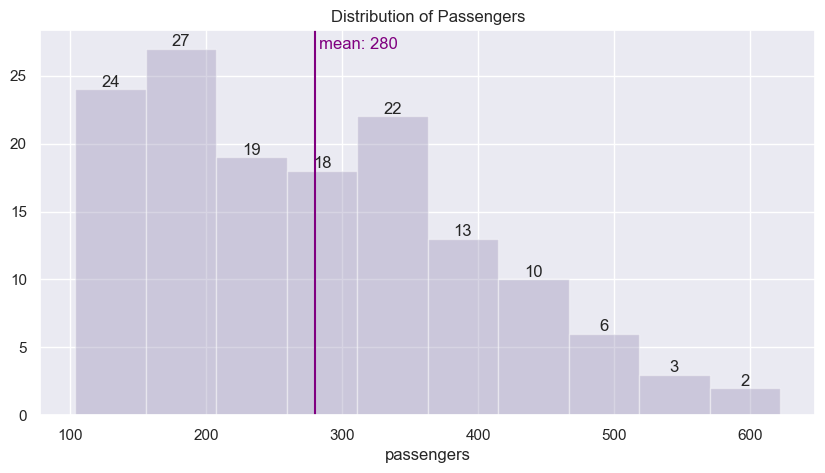

In [7]:
# plot histogram 
ax = sns.distplot(flights['passengers'], color='#9d94ba', bins=10, kde=False)
ax.set(title='Distribution of Passengers')

# adding a vertical line for the average passengers per flight
plt.axvline(flights['passengers'].mean(), color='purple', label='mean')

# adding data label to mean line
plt.text(x = flights['passengers'].mean()+3,  # x-coordinate position of data label, adjusted to be 3 right of the data point
         y = max([h.get_height() for h in ax.patches]),  # y-coordinate position of data label, to take max height 
         s = 'mean: {:.0f}'.format(flights['passengers'].mean()),  # data label
         color = 'purple')  # colour of the vertical mean line

# label each bar in histogram
for p in ax.patches:
    height = p.get_height()  # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2),  # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+0.2,  # y-coordinate position of data label, padded 0.2 above bar
            s = '{:.0f}'.format(height),  # data label, formatted to ignore decimals
            ha = 'center')  # sets horizontal alignment (ha) to center


## Bar Plots

### Vertical Bar Plot

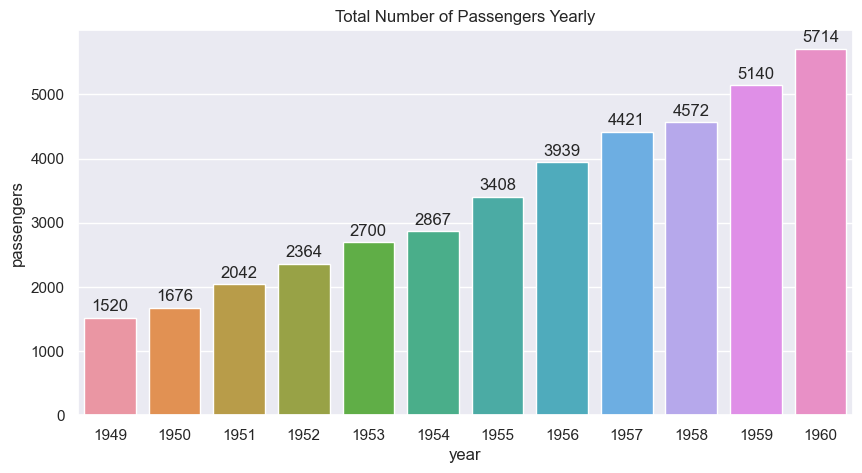

In [8]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='year', y='passengers', data=year_flights)
ax.set(title='Total Number of Passengers Yearly')  # title barplot

# label each bar in barplot
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2),  # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+100,  # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height),  # data label, formatted to ignore decimals
            ha = 'center')  # sets horizontal alignment (ha) to center


### Horizontal Bar Plot

In [9]:
# set up average number of passengers by month dataframe
month_flights = flights.groupby('month').agg({'passengers': 'mean'}).reset_index()
month_flights

,month,passengers
0,Jan,241.750000
1,Feb,235.000000
2,Mar,270.166667
3,Apr,267.083333
4,May,271.833333
5,Jun,311.666667
6,Jul,351.333333
7,Aug,351.083333
8,Sep,302.416667
9,Oct,266.583333


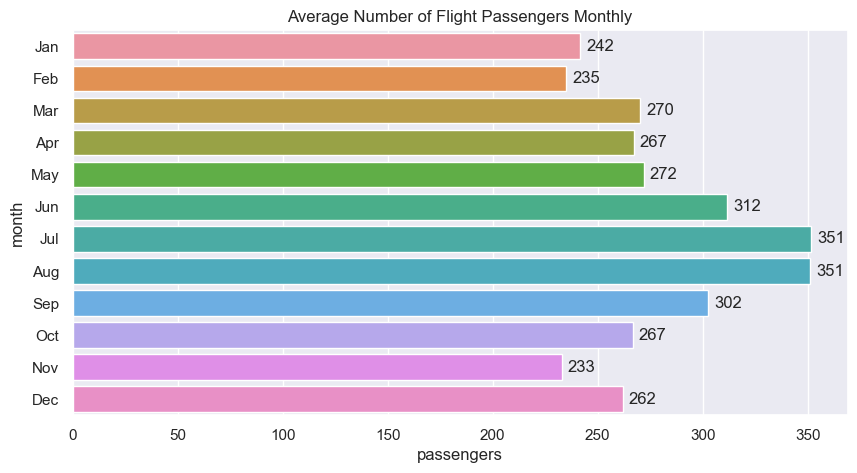

In [10]:
# plot horizontal barplot
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='passengers', y='month', data=month_flights, orient='h')
ax.set(title='Average Number of Flight Passengers Monthly')  # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width()  # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+3,  # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2),  # # y-coordinate position of data label, padded to be in the middle of the bar
            s = '{:.0f}'.format(width),  # data label, formatted to ignore decimals
            va = 'center')  # sets vertical alignment (va) to center


###### References

[matplotlib.text.Text.set_horizontalalignment](https://matplotlib.org/3.1.1/api/text_api.html#matplotlib.text.Text.set_horizontalalignment)

[seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

[seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
